In [56]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter

In [44]:
# LOAD MODEL FROM DISK
loaded_model = pickle.load(open('model/naive_bayes.pkl', 'rb'))
loaded_vect = pickle.load(open('model/vector.pkl', 'rb'))

In [45]:
# IMPORT DATA FROM MONGODB
client = MongoClient("mongodb://localhost:27017/")
collection = client["data"]["remaining"]
data = collection.find()

# GET COMMENT ONLY
data = [[d['text'], d['date']] for d in data]
printer = [print(d) for d in data]

['perintah pindah ibukota jakarta kaltim tidak alas prediksi pulau jawa tenggelam perintah rencana pindah ibukota', '2022-01-20']
['paguyuban kemaruk selangkang', '2022-01-20']
['mati cacing tanah lahap', '2022-01-26']
['umur sehat selau presiden', '2022-08-21']
['insyaalloh perintah pikir baik warga mandi minum beli sabar subur nkri harga mati maju negeri indonesia ku', '2022-09-02']
['sekian presiden pikir hebat ibukota bagus nie jakarta uda penat', '2022-05-05']
['presiden batalin ikn dengar rakyat sana menang', '2022-01-28']
['beban jakarta berat moga bangun ikn lancar berkah jakarta benah tanggulang bencana alam', '2022-06-11']
['pimpin berani buat mgkn sempurna sempurna kecuali diam tahun tidak bangun', '2022-01-20']
['ikn rakyat bisnis investor fix', '2022-01-21']
['asw ikn proyek impi gagal mending bantu rakyat susah hidup', '2022-04-14']
['eman hutan rusak', '2022-01-30']
['tidak tau usul nama kota jara jaman jaja nama kota juluk nama perempuan mahkota peristiwa kirim golong p

In [46]:
# CONVERT LIST TO DATAFRAME
df = pd.DataFrame(data, columns=['text', 'date'])
display(df)

,text,date
0,perintah pindah ibukota jakarta kaltim tidak a...,2022-01-20
1,paguyuban kemaruk selangkang,2022-01-20
2,mati cacing tanah lahap,2022-01-26
3,umur sehat selau presiden,2022-08-21
4,insyaalloh perintah pikir baik warga mandi min...,2022-09-02
...,...,...
19620,tambang sawit rusak hutan kalimantan banjir ma...,2022-07-04
19621,rg nyakmongsil omong hasil kpn surveynya rakya...,2022-02-01
19622,bangun jujur korupsi cepat realisasi cepat tid...,2022-01-18
19623,jual tanah akibat bangun susah cari tanah tempat,2022-02-02


In [47]:
# ADD LABEL COLUMN TO DATAFRAME
df['label'] = 0
display(df)

,text,date,label
0,perintah pindah ibukota jakarta kaltim tidak a...,2022-01-20,0
1,paguyuban kemaruk selangkang,2022-01-20,0
2,mati cacing tanah lahap,2022-01-26,0
3,umur sehat selau presiden,2022-08-21,0
4,insyaalloh perintah pikir baik warga mandi min...,2022-09-02,0
...,...,...,...
19620,tambang sawit rusak hutan kalimantan banjir ma...,2022-07-04,0
19621,rg nyakmongsil omong hasil kpn surveynya rakya...,2022-02-01,0
19622,bangun jujur korupsi cepat realisasi cepat tid...,2022-01-18,0
19623,jual tanah akibat bangun susah cari tanah tempat,2022-02-02,0


In [48]:
# GET SPECIFIED COLUMN
x = df['text']
y = df['label']

In [49]:
# ANALYSIS USING MODEL
x = loaded_vect.transform(x)
result = loaded_model.predict(x)
print(result)

['1' '1' '1' ... '1' '1' '1']


In [50]:
# ASSIGN RESULT TO DATAFRAME
df['label'] = result
display(df)

,text,date,label
0,perintah pindah ibukota jakarta kaltim tidak a...,2022-01-20,1
1,paguyuban kemaruk selangkang,2022-01-20,1
2,mati cacing tanah lahap,2022-01-26,1
3,umur sehat selau presiden,2022-08-21,1
4,insyaalloh perintah pikir baik warga mandi min...,2022-09-02,1
...,...,...,...
19620,tambang sawit rusak hutan kalimantan banjir ma...,2022-07-04,1
19621,rg nyakmongsil omong hasil kpn surveynya rakya...,2022-02-01,-1
19622,bangun jujur korupsi cepat realisasi cepat tid...,2022-01-18,1
19623,jual tanah akibat bangun susah cari tanah tempat,2022-02-02,1


In [51]:
# COMBINE WITH LABELLED DATA
df_labelled = pd.read_excel('data/labelled_data.xlsx', sheet_name=0)
df = pd.concat([df_labelled, df])
display(df)

,text,date,label
0,biaya susah,2022-02-02,-1
1,kelola air utama,2022-01-21,1
2,woy warga indonesia jangan isu pindah kota pol...,2022-01-26,1
3,atur jombang pas ibukotanya,2022-01-26,0
4,smp msh tidak paham pindah,2022-09-07,0
...,...,...,...
19620,tambang sawit rusak hutan kalimantan banjir ma...,2022-07-04,1
19621,rg nyakmongsil omong hasil kpn surveynya rakya...,2022-02-01,-1
19622,bangun jujur korupsi cepat realisasi cepat tid...,2022-01-18,1
19623,jual tanah akibat bangun susah cari tanah tempat,2022-02-02,1


In [52]:
# GROUP BY DATE
period = [[], [], [], [], [], [], [], [], [], [], [], []]

for i, d in df.iterrows():
    if d["date"] >= "2022-01-01" and d["date"] <= "2022-01-31":
        period[0].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-02-01" and d["date"] <= "2022-02-31":
        period[1].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-03-01" and d["date"] <= "2022-03-31":
        period[2].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-04-01" and d["date"] <= "2022-04-31":
        period[3].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-05-01" and d["date"] <= "2022-05-31":
        period[4].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-06-01" and d["date"] <= "2022-06-31":
        period[5].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-07-01" and d["date"] <= "2022-07-31":
        period[6].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-08-01" and d["date"] <= "2022-08-31":
        period[7].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-09-01" and d["date"] <= "2022-09-31":
        period[8].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-10-01" and d["date"] <= "2022-10-31":
        period[9].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-11-01" and d["date"] <= "2022-11-31":
        period[10].append([d["text"], d["date"], d["label"]])
    elif d["date"] >= "2022-12-01" and d["date"] <= "2022-12-31":
        period[11].append([d["text"], d["date"], d["label"]])


printer = [print("Jumlah Komentar Bulan ke-"+str(i+1)+" = " + str(len(p))) for i,p in enumerate(period)]

Jumlah Komentar Bulan ke-1 = 10403
Jumlah Komentar Bulan ke-2 = 3154
Jumlah Komentar Bulan ke-3 = 2492
Jumlah Komentar Bulan ke-4 = 811
Jumlah Komentar Bulan ke-5 = 408
Jumlah Komentar Bulan ke-6 = 806
Jumlah Komentar Bulan ke-7 = 743
Jumlah Komentar Bulan ke-8 = 1291
Jumlah Komentar Bulan ke-9 = 463
Jumlah Komentar Bulan ke-10 = 560
Jumlah Komentar Bulan ke-11 = 352
Jumlah Komentar Bulan ke-12 = 323


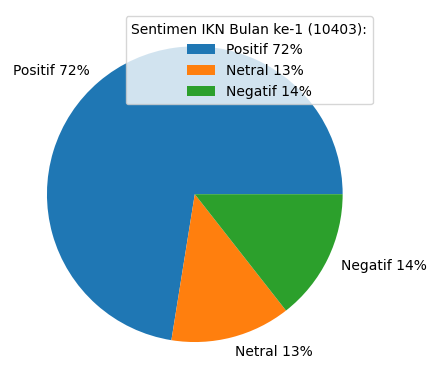

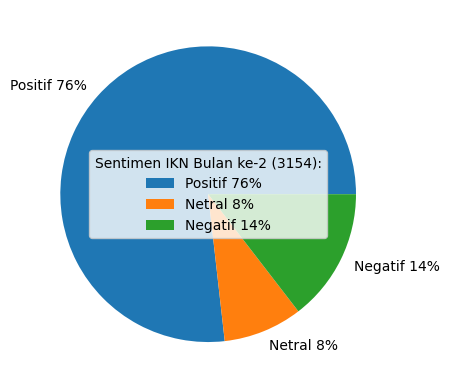

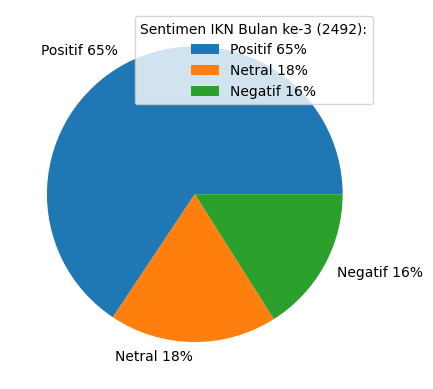

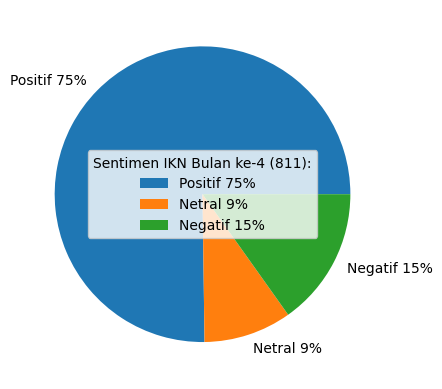

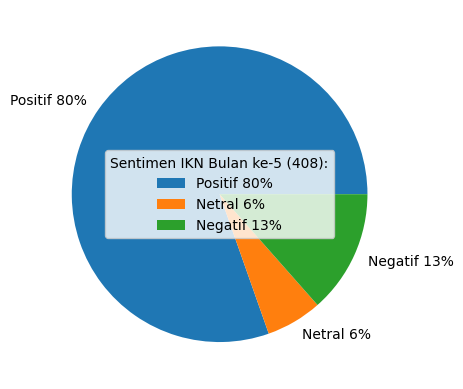

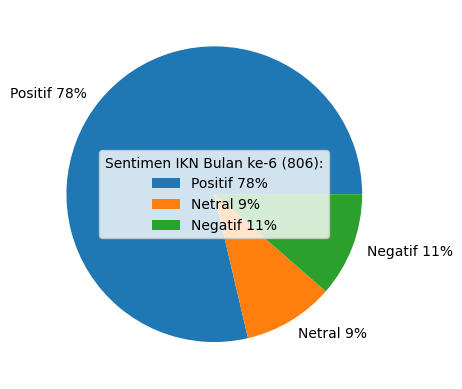

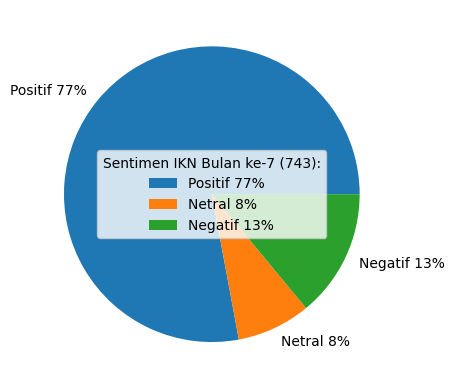

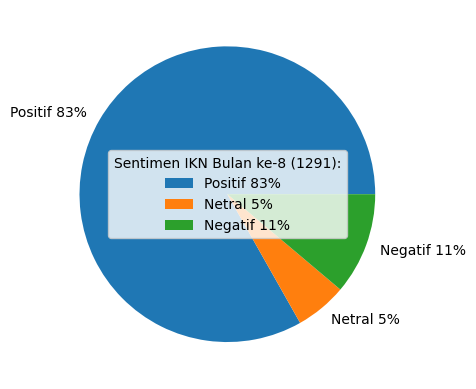

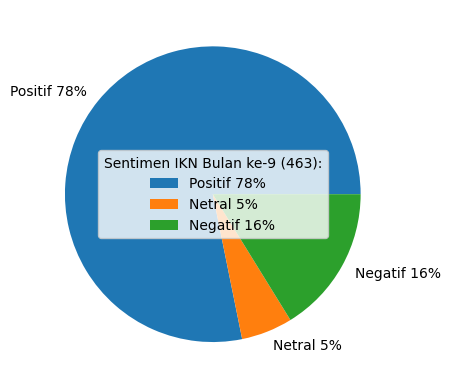

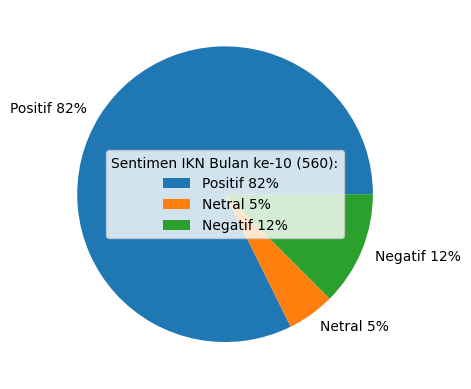

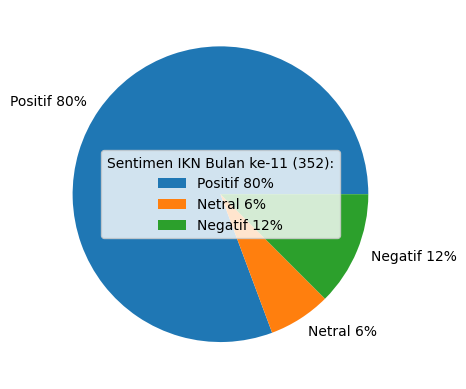

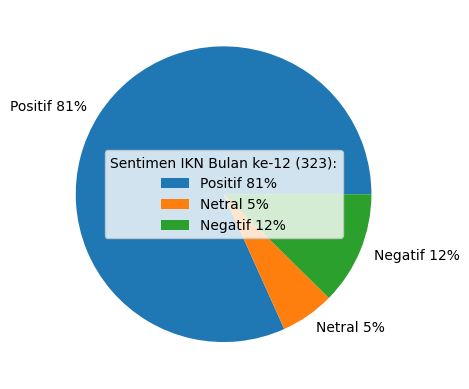

In [68]:
# VISUALIZATION

for i, p in enumerate(period):
    label_list = [str(l[2]) for l in p]
    count = Counter(label_list)

    positive = count['1']
    neutral = count['0']
    negative = count['-1']
    total = positive + neutral + negative

    positive_label = "Positif " + str(int(positive*100/total)) + "%"
    neutral_label = "Netral " + str(int(neutral*100/total)) + "%"
    negative_label = "Negatif " + str(int(negative*100/total)) + "%"

    data = np.array([positive, neutral, negative])
    label = [positive_label,neutral_label, negative_label]
    title = "Sentimen IKN Bulan ke-"+str(i+1)+" (" + str(total) + "):"
    plt.pie(data, labels = label)
    plt.legend(title = title)
    plt.axis("off")
    plt.show() 